
# K-Means Clustering Procedure

This notebook demonstrates **K-Means Clustering** on two datasets:

1. `CC GENERAL.csv` — Credit Card Customer Data  
2. `bank_transactions_data_2.csv` — Bank Transactions Data  (Activity)

Each dataset section includes:
- Preprocessing and scaling
- Elbow Method visualization
- Clustering analysis
- **Student activity:** Do the procedures on the bank transactions data


In [2]:

# ============================================================
# IMPORT LIBRARIES
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


## PART 1: Credit Card Data Clustering

In [3]:

# --- LOAD DATASET ---
df_cc = pd.read_csv('CC GENERAL.csv')
print("Credit Card Dataset Loaded Successfully.")
print(df_cc.shape)
df_cc.head()


Credit Card Dataset Loaded Successfully.
(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:

# --- DATA PREPROCESSING ---
df_cc = df_cc.dropna()

# Drop customer ID if present
if 'CUST_ID' in df_cc.columns:
    df_cc = df_cc.drop(columns=['CUST_ID'])

scaler = StandardScaler()
scaled_cc = scaler.fit_transform(df_cc)


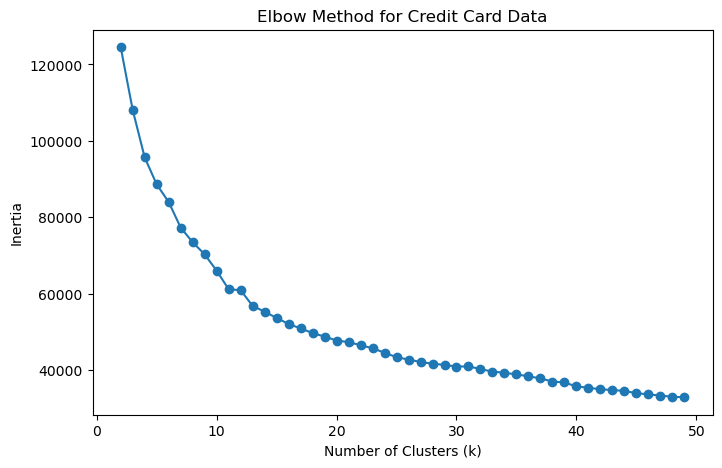

In [5]:

# --- K-MEANS ELBOW METHOD ---
inertia = []
k_values = range(2, 50)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_cc)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Credit Card Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [6]:

# --- FIT OPTIMAL MODEL ---
k_optimal = 10
kmeans_cc = KMeans(n_clusters=k_optimal, random_state=42)
df_cc['Cluster'] = kmeans_cc.fit_predict(scaled_cc)

df_cc.groupby('Cluster').mean()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,5252.139405,0.955469,1019.283316,616.093904,403.189412,9603.547743,0.400688,0.213009,0.288454,0.647490,28.941176,14.085561,9243.582888,9699.790805,2162.607623,0.099668,11.556150
1,764.213394,0.961222,929.550680,185.400274,744.621297,200.472198,0.897878,0.087343,0.855806,0.038209,0.742225,19.439642,3491.549922,1103.852232,759.411619,0.255601,11.868213
2,907.791717,0.828373,387.123853,223.802209,163.835342,1166.492774,0.429649,0.117344,0.293113,0.205830,3.368151,5.291096,2439.417808,630.729679,346.699519,0.165855,7.253425
3,4503.333537,0.983471,9945.073068,4516.177955,5435.713295,950.862835,0.951705,0.637225,0.891959,0.085227,2.795455,132.897727,10625.568182,9576.508479,4070.522744,0.279732,11.920455
4,1357.464753,0.973882,232.949401,180.026089,53.132122,590.925011,0.149933,0.079533,0.070452,0.133577,2.466245,2.712658,3044.838256,920.511306,688.593164,0.020818,11.890295
5,132.860896,0.422145,365.978125,213.601442,152.662067,316.881985,0.270669,0.074320,0.188434,0.033726,0.741346,4.460577,3915.037927,1279.413947,161.769951,0.279828,11.817308
6,2815.032534,0.987280,4451.403908,2964.714037,1486.689872,589.155676,0.958665,0.691678,0.828099,0.085410,1.924771,64.851376,8369.633028,4143.754449,1132.676050,0.230955,11.952294
7,5109.411343,0.949545,29095.715500,24021.496000,5074.219500,1115.627041,0.890833,0.840000,0.665000,0.045833,2.050000,123.150000,16075.000000,28948.783088,2870.119120,0.525947,11.900000
8,4536.490620,0.976793,354.772702,224.550618,130.323450,3370.317379,0.233858,0.101743,0.149129,0.427842,11.103689,5.306082,7280.961660,2383.123868,2188.227057,0.020981,11.697906


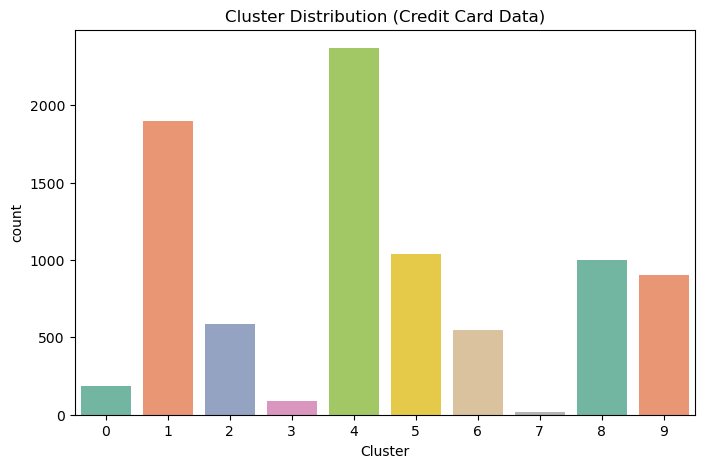

In [7]:

# --- VISUALIZE CLUSTERS ---
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df_cc, palette='Set2')
plt.title('Cluster Distribution (Credit Card Data)')
plt.show()



### Random Search Optimization on K-Means (Credit Card Data)

In [8]:

results = []

for i in range(25):
    k = np.random.randint(2, 100)
    init_method = np.random.choice(['k-means++', 'random'])
    max_iter = np.random.randint(100, 500)

    model = KMeans(n_clusters=k, init=init_method, max_iter=max_iter, random_state=42)
    labels = model.fit_predict(scaled_cc)
    silhouette = silhouette_score(scaled_cc, labels)

    results.append({
        'k': k,
        'init': init_method,
        'max_iter': max_iter,
        'silhouette_score': silhouette
    })

pd.DataFrame(results).sort_values(by='silhouette_score', ascending=False)


,k,init,max_iter,silhouette_score
10,10,random,247,0.229813
23,13,k-means++,182,0.220362
20,13,k-means++,320,0.220362
9,12,random,215,0.217208
2,19,k-means++,196,0.207773
8,26,k-means++,487,0.183291
17,26,random,129,0.180492
21,27,k-means++,180,0.180479
5,54,k-means++,271,0.175051
13,43,k-means++,161,0.173902


## 💳 PART 2: Bank Transactions Data Clustering

In [14]:

# --- LOAD DATASET ---



In [15]:

# --- DATA PREPROCESSING ---
# Drop non-numeric columns (e.g., text IDs)



In [16]:

# --- ELBOW METHOD ---



In [17]:

# --- FIT OPTIMAL MODEL ---



In [18]:

# --- VISUALIZE CLUSTERS ---




### Student Activity 2: Random Search Optimization on K-Means (Bank Transactions Data)

**Task:**  
Perform a random search optimization to find the best K-Means configuration.

**Instructions:**
1. Define random ranges for:
   - `n_clusters` (e.g. 2–10)
   - `init` method (`'k-means++'`, `'random'`)
   - `max_iter` (e.g. 100–500)
2. Randomly sample 10–15 configurations and record:
   - Inertia
   - Silhouette Score
3. Identify the best configuration.


In [ ]:
# CODE HERE

# Conclusion/Analysis

***Conclusion Analysis Here***